# 1. Overview  

>This report starts with the scope of this project being exploratory data analysis of Montreal BIXI data merged with historical weather data giving insights over behaviour and different patterns of the bike users, followed by the audience of this work who are likely to get benefited with these insights or offer help to improve the bike sharing system. This is followed by the questions which are likely to be asked and cover the scope of the project. Then the  data, i.e. its sources, dimensions, type of these dimensions and cleaning of data which will contain the whole process of data preparation before plotting it over the charts.

>Visualization design will follow next to explain the steps taken to answer the questions asked with the proof of data over an interactive visualization environment. The design explain the choices of plots and the axes to represent the data followed by the interactions which show the changes in the plots based on the subset of data selected. Design is followed by future work which includes further visualizations to support the design and the scope of this project but have not been implemented in this work and conclusions to reassure that this project has been able to answer the questions under the scope. Finally the references section mentions the those sources without whose help this work wouldn’t have been possible and appendices section gives the steps to run the main project as well as the structure of the notebook with sample visualizations.


# 2. Introduction (Description of Criterion)

Being a 4 year long data available for Montreal Bike sharing system, it holds a huge scope to infer the salient patterns and behaviour of the bike users. As North America’s first largest Bike sharing system it provides an essential mode of transportation to the residents of Montreal city.
-  General Scope of this project : To explore the different patterns and behaviour of the bike users through exploratory data analysis of the BIXI bike sharing data coupled with weather data. We would get the patterns differentiating members from non-members, good from bad weather as well as obtaining information of different stations with respect to the previous. 
-  Audience :
    -  __Tourists__ as well as those __moving to the famous city of Montreal__ are very likely to use the BIXI bike sharing system and would find the insights from this project very helpful.
    -  The __policy makers__ would be able to augment such a prominent transportation system with the help of different patterns and behaviour pruned out of the data and represented through visualization.
    -  Further __private business owners__ can bring in mutual benefit plans to generate revenue and job opportunities adding to the economy. 
    -  As the design being big, there would be more questions and further development of this project possible any enthusiastic __individual in visualization domain__ to not pick it all up from the scratch.

# 3. Problem/Domain Questions (Description of Criterion)

1. What are the rush hours and the most frequent stations in those hours. How many average bikes are available in those hours? __(tourists, policy makers and private business owners)__
2.  How members and non-members differ in counts and average duration in these rush hours? __(private business owners)__
3. How does the members differ from non-members based on the popularity of stations over duration of bike taken and frequency to visit those stations? __(policy makers and private business owners)__
4. How does the above mentioned visualizations differ in a non-rush hour or a different rush hour? __(tourists, policy makers and private business owners)__
5. How frequencies change due to a bad weather compared to a good one? What are the hours in which the bike travels continue even in a bad weather and whether those are member or non-members? __(policy makers and private business owners)__
6. If there are people travelling at high wind speed are they more likely to be members or non-members and what kind of hour they most likely travel? __(policy makers and private business owners)__
7. What are those stations being used even in a bad weather and what are those routes being taken from start station to the end ones? __(policy makers and private business owners)__

# Data 

## Visualization 1 :

 Data in this visualization is only the BIXI Montreal data and doesn’t include the weather data.
-   __Source :__ kaggle.com 
-  __Description :__ BIXI Montreal (Public bicycle sharing system)- data on North-America’s first large scale bike sharing system.             		
(url : https://www.kaggle.com/aubertsigouin/biximtl/activity), ~12 million rows with and 7 columns for main data while 546 rows and 4 columns for station data.
-  __Dimensions :- Main Data-__ start_date : Nominal (as kept in hours), start_station_code : Nominal,  end_station_code : Nominal , end_date : Nominal (as kept in hours), is_member : Nominal, duration_sec : Quantitative, as well as the counts will be Quantitative. __Station Data-__ code : Nominal, name : Nominal
-  __Cleaning/Preparation :__
    - Main data were __union__ ed for 4 years as they were available for different years.
    -  Hour were retrieved from the start_date and end_date to be used as nominal values as they were in timestamp. Station Data was joined over __station_code__ to get the names of the stations.
    - Groupby on the main data over __start_hour, start_station_code and is_member__ taking aggregates as count and mean over duration_sec to get duration_mean. This helped to get the average counts on a particular hour of the day and for a specific station as well as if those counts were by the members or not. Similarly taking average duration under all these specific values of start_date, start_station_code and is_member. Groupby again on the main data but this time over __end_hour, end_station_code__ and __is_member__ to get the counts. Then this data was joined with the station data to get the station names. Then these two tables are joined over __start_hour__ and __end_hour__ and the the field vacancy is created by subtracting end count from the start count which basically means no. of bikes coming to the station minus no. of bikes going away.
    - Percentile bar which represents the popularity of stations is created by using quantile method from pandas over the average counts obtained from the previous process. This cuts the stations in a specific hour based on the percentile of their counts.
    - Few more further cleaning has been done like changing seconds to minutes and __is_member__ values to ‘Y’ and ‘N’ etc.

<font color=red> *The code below requires Main data __(Montreal BIXI bike data)__ to be downloaded from the above URL and to be kept inside data/raw_data folder from where this notebook exists.*<br> __The cells under this heading don't need to be executed. Prepared data already exist in the data folder. These cells are very computationally expensive and may take ~10-15 minutes to execute.__ </font>

In [ ]:
# Reading raw main data from the file system and unioning them.

cycl14_df = pd.read_csv("~/Downloads/sfu5/IAT814/final_project/OD_2014.csv")
cycl15_df = pd.read_csv("~/Downloads/sfu5/IAT814/final_project/OD_2015.csv")
cycl16_df = pd.read_csv("~/Downloads/sfu5/IAT814/final_project/OD_2016.csv")
cycl17_df = pd.read_csv("~/Downloads/sfu5/IAT814/final_project/OD_2017.csv")

vis1_cycl_df = pd.concat([cycl14_df, cycl15_df, cycl16_df, cycl17_df])[['start_date', 'start_station_code', 'end_date', 'end_station_code', 'duration_sec', 'is_member']]

In [ ]:
# Stripping hour from the datetime and groupingby over 'start_date_hr', 'start_station_code', 'is_member', 'end_date'

vis1_cycl_df['start_date_hr'] = vis1_cycl_df['start_date'].apply(lambda x : int(x[11:13]))
vis1_cycl_df['end_date_hr'] = vis1_cycl_df['end_date'].apply(lambda x : int(x[11:13]))
vis1_hr_start_df = vis1_cycl_df[['start_date_hr', 'start_station_code', 'is_member', 'end_date']].groupby(['start_date_hr', 'start_station_code', 'is_member']).count().reset_index(level = [0, 1, 2]).rename(columns = { 'end_date' : 'start_station_count'})
vis1_hr_end_df = vis1_cycl_df[['end_date_hr', 'end_station_code', 'is_member', 'start_date']].groupby(['end_date_hr', 'end_station_code', 'is_member']).count().reset_index(level = [0, 1, 2]).rename(columns = { 'start_date' : 'end_station_count', 'end_date_hr' : 'start_date_hr', 'end_station_code' : 'start_station_code'})
vis1_hr_dur_sec_df = vis1_cycl_df[['start_date_hr', 'start_station_code', 'is_member', 'duration_sec']].groupby(['start_date_hr', 'start_station_code', 'is_member']).mean().reset_index(level = [0, 1, 2]).rename(columns = { 'duration_sec' : 'duration_mean'})

<font color=red> *The code below requires Station data to be downloaded from the above URL and to be kept inside data/raw_data folder from where this notebook exists.* </font>

In [ ]:
# Reading raw station data from the file system and unioning them.

vis1_st14_df = pd.read_csv("./data/raw_data/Stations_2014.csv")[['code', 'name', 'latitude', 'longitude']]
vis1_st15_df = pd.read_csv("./data/raw_data/Stations_2015.csv")[['code', 'name', 'latitude', 'longitude']]
vis1_st16_df = pd.read_csv("./data/raw_data/Stations_2016.csv")[['code', 'name', 'latitude', 'longitude']]
vis1_st17_df = pd.read_csv("./data/raw_data/Stations_2017.csv")[['code', 'name', 'latitude', 'longitude']]

vis1_st_df = pd.concat([st14_df, st15_df, st16_df, st17_df])[['code', 'name', 'latitude', 'longitude']].drop_duplicates(['code'])


In [ ]:
# joining for the final table 814 is the number of days in the whole 4 years data, this cell is computationally expensive.

join1_df = pd.merge(vis1_hr_start_df, vis1_hr_end_df, on = ['start_date_hr', 'start_station_code', 'is_member'])
vis1_hr_df = pd.merge(join1_df, vis1_hr_dur_sec_df, on = ['start_date_hr', 'start_station_code', 'is_member'])
vis1_hr_df['start_station_count'] = vis1_hr_df['start_station_count']/814
vis1_hr_df['end_station_count'] = vis1_hr_df['end_station_count']/814
vis1_hr_df = vis1_pd.merge(vis1_hr_df, vis1_st_df[['code', 'name']], left_on = 'start_station_code', right_on = 'code')
vis1_hr_df = vis1_hr_df.drop(columns = ['code'])
vis1_hr_df = vis1_hr_df.rename({'name' : 'start_station_name'})

In [ ]:
# Calculating the percentile values for the range bar

percentile = [0.0178359096313912, 0.04399524375743163, 0.07966706302021404, 0.13317479191438764, 0.21759809750297265, 0.356718192627824, 0.5766944114149821, 0.9678953626634959, 1.8763376932223543, 25.505350772889418]
def get_per(st_count):
    if(st_count <= 0.0178359096313912):
        return 10
    elif(st_count > 0.0178359096313912 and st_count <= 0.04399524375743163):
        return 20
    elif(st_count > 0.04399524375743163 and st_count <= 0.07966706302021404):
        return 30
    elif(st_count > 0.07966706302021404 and st_count <= 0.13317479191438764):
        return 40
    elif(st_count > 0.13317479191438764 and st_count <= 0.21759809750297265):
        return 50
    elif(st_count > 0.21759809750297265 and st_count <= 0.356718192627824):
        return 60
    elif(st_count > 0.356718192627824 and st_count <= 0.5766944114149821):
        return 70
    elif(st_count > 0.5766944114149821 and st_count <= 0.9678953626634959):
        return 80
    elif(st_count > 0.9678953626634959 and st_count <= 1.8763376932223543):
        return 90
    else:
        return 100
    
vis1_hr_df['percentile'] = vis1_hr_df['start_station_count'].apply(get_per)

In [ ]:
# Calculating the Vancancy values and normalizing duration to minutes and converting is_member to 'Y' and 'N'

vis1_hr_df['vacancy'] = vis1_hr_df[['start_station_count', 'end_station_count']].apply(lambda row : row['end_station_count'] - row['start_station_count'], axis = 1)
vis1_hr_df = vis1_hr_df.drop_duplicates()
vis1_hr_df['duration_mean'] = vis1_hr_df['duration_mean']/60.0
vis1_hr_df['is_member'] = vis1_hr_df['is_member'].apply(lambda x : 'Y' if (x == 1) else 'N')

<font color=green> *Writing data below required for the first visualization in data folder __from__ where this notebook exists. __This data has been uploaded while submitting the assignment so there isn't a need to do the expensive data cleaning by executing the above code cells.__* </font>

In [ ]:
 # vis1_hr_df.to_csv('./data/vis1_hr.csv', index = False)

## Visualization 2 
Data in this visualization is both BIXI Montreal data and the historical weather data.
-  __Source :__ kaggle.com(url : https://www.kaggle.com/selfishgene/historical-hourly-weather-data )
-  __Description :__ 6 different tables with 45.3k rows and 37 tables for different weathers i.e. weather_description, humidity, pressure, temperature, wind_direction, wind_speed out of which only three tables i.e. __wind_speed, temperature__ and __weather_description__ has been used.
-  Cleaning/Preparation :
    - Different weather tables are joined based on timestamp to get the three columns __wind_speed, temperature__ and __weather_description__ in one table and only for the city Montreal. Further this table is joined with the BIXI Montreal table over the hour column to make up a one big main table consisting data for 4 longs years.
    - As this data is also visualized for different hours of the day aggregated over all the days in the data, __temperature__ and __wind_speed__ had to be made into __buckets__ using cut in pandas.
    - Then a groupby was done over columns __'hour', 'weather_desc', 'is_member', 'temp_bin', 'wind_bin'__ and data was aggregated as mean over duration_sec (i.e. duration_mean) and counts. This means that based on particular hour of the day, weather description, membership, the bin of temperature and bin of the wind_speed it was calculated that how many people were using the bikes on an average and how much average time they took in making those trips.
    - As there were many different types of weather_description those which had rain , snow, thunderstorm and clouds in their description were converted to only those words as their description respectively.
    - Further the data was normalized i.e. wind_speed was changed from m/sec to km/hr, temperature was changed from kelvin to fahrenheit, duration_mean was changed from seconds to minutes etc.

<font color=red> *The code below requires __Weather data__ to be downloaded from the above URL and to be kept inside data/raw_data folder from where this notebook exists.*<br> __The cells under this heading don't need to be executed. Prepared data already exist in the data folder. These cells are very computationally expensive and may take ~10-15 minutes to execute.__ </font>

In [ ]:
# Making copy of data from visualiztion 1 to be used for visualization 2

vis2_cycl_df = vis1_cycl_df
vis2_st_df = vis1_st_df

In [ ]:
# Reading weather data and preparation

vis2_weather_desc_df = pd.read_csv("./data/raw_data/weather_description.csv")[['datetime', 'Montreal']]
vis2_temperature_df = pd.read_csv("./data/raw_data/temperature.csv")[['datetime', 'Montreal']]
vis2_wind_direction_df = pd.read_csv("./data/raw_data/wind_direction.csv")[['datetime', 'Montreal']]
vis2_wind_speed_df = pd.read_csv("./data/raw_data/final_project/wind_speed.csv")[['datetime', 'Montreal']]

vis2_temperature_df['temperature'] = vis2_temperature_df['Montreal'].apply( lambda x : (x*9/5) - 459.67)
vis2_weather_desc_df.rename(columns = {'Montreal' : 'weather_desc'}, inplace = True)
vis2_temperature_df.drop(columns = ['Montreal'], inplace = True)
vis2_wind_direction_df.rename(columns = {'Montreal' : 'wind_dir'}, inplace = True)
vis2_wind_speed_df.rename(columns = {'Montreal' : 'wind_speed'}, inplace = True)
vis2_weather_df = pd.concat([vis2_weather_desc_df, vis2_temperature_df, vis2_wind_direction_df, vis2_wind_speed_df], axis = 1, join = 'inner')
vis2_weather_df = vis2_weather_df.loc[:,~vis2_weather_df.columns.duplicated()]

In [ ]:
# Joining weather data with Montreal BIXI bike sharing data

vis2_weather_df = vis2_weather_df[['datetime', 'weather_desc', 'temperature', 'wind_speed']]
vis2_weather_df['date'] = vis2_weather_df['datetime'].apply(lambda x : x[:13])
vis2_cycl_df['date'] = vis2_cycl_df['start_date'].apply(lambda x : x[:13])
vis2_join1_df = pd.merge(vis2_cycl_df, vis2_weather_df, on = ['date'])
vis2_join1_df.dropna()

In [ ]:
# Stripping hour from the datetime, making buckets for temperature and wind_speed and groupingby over 'hr', 'weather_desc', 'is_member', 'temp_bin', 'wind_bin' , and aggregation mean over duration_sec and counts

vis2_join1_df['hr'] = vis2_join1_df['date'].apply(lambda x : int(x[-2:]))
vis2_join_df = vis2_join1_df.drop(columns = ['start_date', 'start_station_code', 'end_date', 'end_station_code','datetime'])
vis2_join_df['temp_bin'] = pd.cut(vis2_join_df['temperature'].values, 10)
vis2_join_df = vis2_join_df.astype({'temp_bin' : str})
vis2_join_df['wind_speed'] = vis2_join_df['wind_speed'] * 18.0 / 5.0
vis2_join_df['wind_bin'] = pd.cut(vis2_join_df['wind_speed'].values, 5, right = False)
vis2_join_df = vis2_join_df.astype({'wind_bin' : str})
vis2_join_df = vis2_join_df.groupby(['hr', 'weather_desc', 'is_member', 'temp_bin', 'wind_bin'], as_index = False).agg({'duration_sec' : 'mean', 'date' : 'count'})
vis2_join_df = vis2_join_df.rename(columns = {'date' : 'count', 'duration_sec' :'duration_mean'})

In [ ]:
# Make buckets for weather description

def buckWeather(weather):
    if(weather.endswith("rain")):
        return "rain"
    elif(weather.endswith("clouds")):
        return "cloudy"
    elif(weather.endswith("snow")):
        return "snow"
    elif(weather.endswith("thunderstorm")):
        return "thunderstorm"
    else:
        return weather

vis2_join_df['weather_desc'] = vis2_join_df['weather_desc'].apply(buckWeather)

In [ ]:
# 814 is the number of days in the whole 4 years data

vis2_join_df['count'] = vis2_join_df['count']/814
vis2_join_df['duration_mean'] = vis2_join_df['duration_mean']/60.0
vis2_join_df['is_member'] = vis2_join_df['is_member'].apply(lambda x : 'Y' if (x == 1) else 'N')

<font color=green> *Writing data below required for the second visualization in data folder __from__ where this notebook exists. __This data has been uploaded while submitting the assignment so there isn't a need to do the expensive data cleaning by executing the above code cells.__* </font>

In [ ]:
# join_df.to_csv("./data/vis2_hr_weather.csv", index = False)

## Visualization 3 
Same data which was used for visualization 2 but with groupby on different columns i.e. __'start_station_code', 'weather_desc', 'is_member', 'end_station_code'__ . This will give all the routes and the stations under a specific weather such that we can find out all those stations and routes which are used in bad weather and what is their frequency and whether whose use it are members or not.

<font color=red> __The cells under this heading don't need to be executed. Prepared data already exist in the data folder. These cells are very computationally expensive and may take ~10-15 minutes to execute.__ </font>

In [ ]:
# Only one year data is taken as weather joined with all the stations and for every hour is ~200,000 rows of data

vis3_cycl_df = pd.read_csv("./data/raw_data/OD_2017.csv")[['start_date', 'start_station_code', 'end_station_code', 'duration_sec', 'is_member']]
vis3_st_df = vis1_st_df
vis3_weather_df = vis2_weather_df

In [ ]:
# Stripping out the hour from the timestamp and joining Montreal BIXI data with weather data

vis3_weather_df['date'] = vis3_weather_df['datetime'].apply(lambda x : x[:13])
vis3_cycl_df['date'] = vis3_cycl_df['start_date'].apply(lambda x : x[:13])
vis3_join1_df = pd.merge(vis3_cycl_df, vis3_weather_df, on = ['date'])
vis3_join1_df = vis3_join1_df.drop(columns = ['start_date','datetime'])
vis3_join_df = vis3_join1_df.dropna()

In [ ]:
# grouping by on 'start_station_code', 'weather_desc', 'is_member', 'end_station_code', and aggregation mean over duration_sec and counts

vis3_join_df = vis3_join_df.groupby(['start_station_code', 'weather_desc', 'is_member', 'end_station_code'], as_index = False).agg({'duration_sec' : 'mean', 'date' : 'count'})
vis3_join_df = vis3_join_df.rename(columns = {'date' : 'count', 'duration_sec' :'duration_mean'})
vis3_join1_df = pd.merge(vis3_join_df, vis3_st_df, left_on = ['start_station_code'], right_on = ['code'])
vis3_join1_df = vis3_join1_df.rename(columns = {'name':'start_station_name'})
vis3_join1_df = vis3_join1_df.drop(columns = ['code'])
vis3_join1_df = pd.merge(vis3_join1_df, vis3_st_df, left_on = ['end_station_code'], right_on = ['code'])
vis3_join1_df = vis3_join1_df.rename(columns = {'name':'end_station_name'})
vis3_join1_df = vis3_join1_df.drop(columns = ['start_station_code', 'end_station_code', 'code'])

In [ ]:
# Making buskets of weather

def buckWeather(weather):
    if(weather.endswith("rain")):
        return "rain"
    elif(weather.endswith("clouds")):
        return "cloudy"
    elif(weather.endswith("snow")):
        return "snow"
    elif(weather.endswith("thunderstorm")):
        return "thunderstorm"
    else:
        return weather

vis3_join1_df['weather_desc'] = vis3_join_df['weather_desc'].apply(buckWeather)

In [ ]:
vis3_join1_df['duration_mean'] = vis3_join1_df['duration_mean'] / 60.0
vis3_join1_df['is_member'] = vis3_join_df['is_member'].apply(lambda x : 'Y' if (x == 1) else 'N')

<font color=green> *Writing data below required for the third visualization in data folder __from__ where this notebook exists. __This data has been uploaded while submitting the assignment so there isn't a need to do the expensive data cleaning by executing the above code cells.__* </font>

In [ ]:
# join1_df.to_csv('./data/vis3_routes.csv', index = False)

#  Design 

## Visualization 1

### Sample Visualization 1 : (only 10 % data)

<font color=green> *__Execute the cell below to view the sample visualization 1__* <br><br></font>
<font color=red> *__The cell below needs altair to be installed in your PC for jupyter notebook. If altair for jupyter notebook is not installed in your PC please refer :  https://altair-viz.github.io/getting_started/installation.html__* </font>

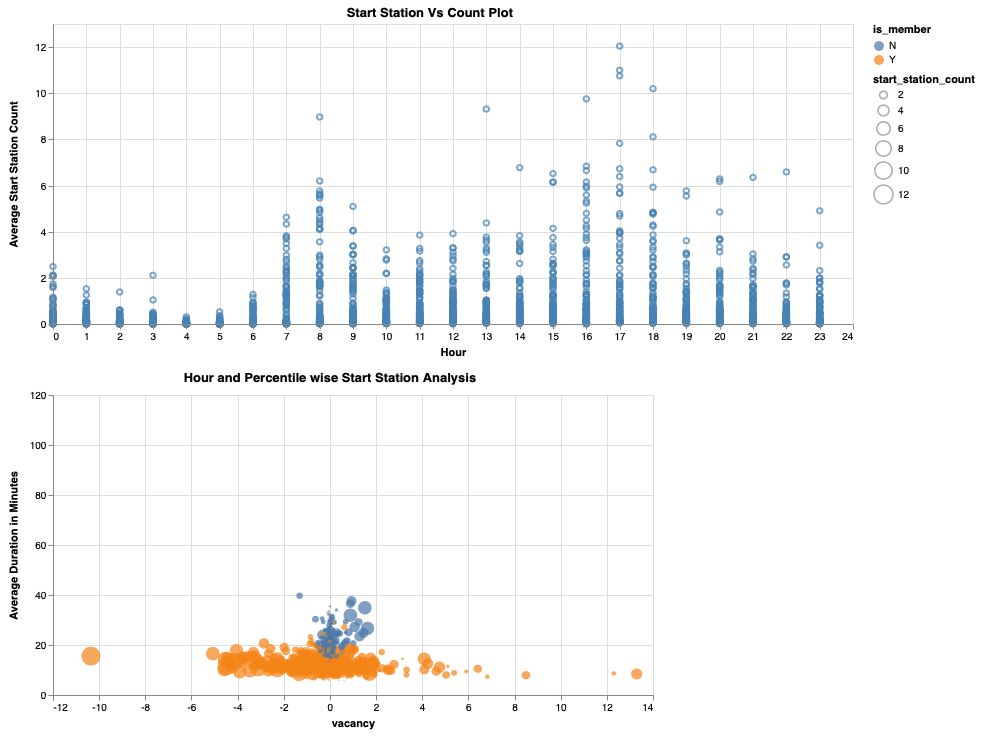

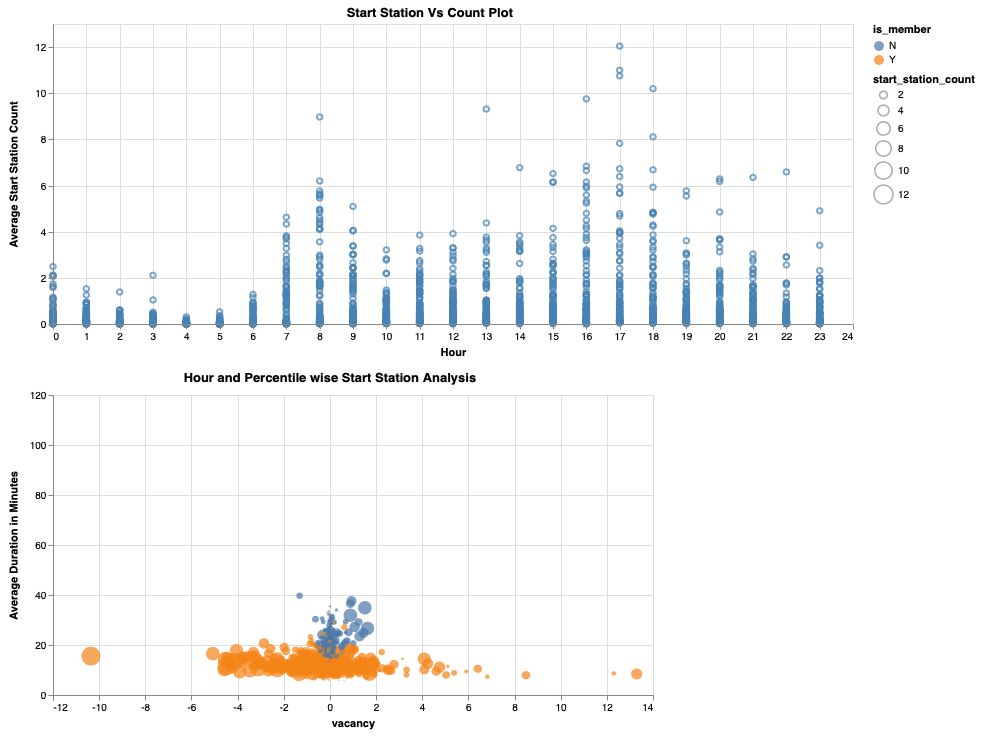

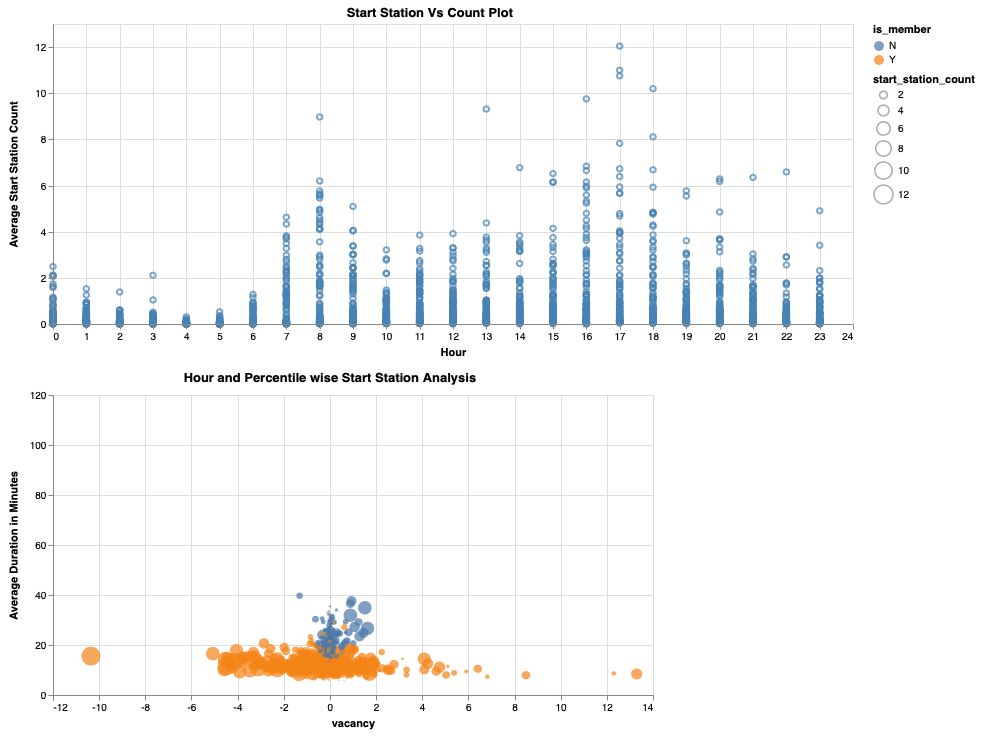

In [4]:
import pandas as pd
import altair as alt

vis1_df = pd.read_csv('./data/vis1_hr.csv').sample(frac = 0.1)
alt.renderers.enable('notebook')

interval = alt.selection_single(fields = ["start_date_hr"])

scatter = alt.Chart(vis1_df).mark_point(color = 'red', size=30).encode(
    x=alt.X('start_date_hr:Q', title='Hour'),
    y=alt.Y('start_station_count:Q', title='Average Start Station Count'),
    color= alt.condition(interval,alt.value('steelblue'), alt.value('lightgray')),
    tooltip = 'name'
).properties(
    selection=interval,
    width=800,
    title='Start Station Vs Count Plot'
)


percent_slider = alt.binding_range(min=10, max=100, step=10)
slider_selection = alt.selection_single(bind=percent_slider, fields=['percentile'], name = "percentile")
scatter1 = alt.Chart(vis1_df).mark_circle().encode(
x='vacancy:Q',
y=alt.Y('duration_mean:Q', title='Average Duration in Minutes'),
size=alt.Size('start_station_count:Q'),
color = 'is_member:N',
tooltip = [alt.Tooltip(shorthand = 'name:N', title = ("Start Station Name")),alt.Tooltip(shorthand = 'start_station_count:Q', title = ("Average No. of Bikes Taken"))]
).properties(
selection=interval,
title='Hour and Percentile wise Start Station Analysis',
width=600
).transform_filter(
interval
).add_selection(
slider_selection
).transform_filter(
slider_selection
).interactive()
scatter & scatter1


-  __Components : (FULL DATA)__
    - A __scatter plot at the top__ to represent different stations along different hours of the day and their counts. Design choices :
        - __X-axis :-__ hour : Nominal. Hour is chosen nominal as different hours along the day was to be considered as different groups to see how change in hour changes the scenario.
        - __Y-axis :-__ counts : Quantitative. Counts being in the y-axis juxtaposed to hours over the plot of different stations give the position to those stations based on how frequently they were used as well as picks out that hour which has high/low frequent stations.
        - __Color :-__ Color doesn’t depend on any column values but if an hour is selected then rest of the plotted station fades to grey as there is an interaction involved in that choice.
        - __Tooltip :-__ Tooltip contains the name of the station hovered on.
    - Another __scatter plot just below the previous scatter plot__ to represent the selected stations based on the hour plotted against vacancy and duration_mean  to show the stations with average number of bikes present in those stations in the hour selected and the average duration taken by the bikers in this scenario. Design choices :
        - __X-axis :-__  vacancy : Quantitative. These values show the average number of bikes likely to be present in the chosen hour and it is fractional and also with negative values. This scale can easily represent those stations which has average excess/deficit number of bikes in the chosen hour.
        - __Y-axis :-__ duration_mean : Quantitative. These are the values which represent the average time taken by the rider while making the journey. This scale can well different between those who took less time and those who took more along their journey.
        - __Color :-__ is_member : Nominal. There are only two i.e. members or non-members and can easily support the differentiability on the plot.
        - __Tooltip :-__ station_name, counts (As average number of bikes taken).
    - A __range bar from 10-100__ with steps of 10 representing the percentile of the counts of the stations plotted.
-  __Interactions :__
    - The first plot is linked with the second plot just below it, in which when an hour is selected stations only in those hours are plotted on the second plot. With this selection the rest of the plotted points in the first plot greys out.
    - The range bar is connected with the second plot which when dragged horizontally changes the plotted station in the second plot based on the percentile selected in the range bar.


-  Screenshots of plots and how they relate to the questions asked :

<img src="./project_plots/plot1_1.png" alt="figure doesn't in the path specified" title="Hour wise plot of Montreal BIXI bike sharing data" />

-  Questions that the above plot relates to :
    - Here on the top graph, the most frequent hour is at 5pm which connects to the plot below showing that journeys are mostly made by the members rather than the non-members. __(question 1)__
    - Plots on the second graph can be hovered upon to see  those stations and the x-axis would represent the average number of bikes available in that hour in those stations. Here they are very high with 3 stations on the left side having the average vacancy value of ~ -15 which means that 15 deficit bikes are there on an average in those three stations at 5pm and one is rather unlikely to get a bike at that time. __(question 1 and 2)__
    - Based on the average duration we can see that the members are very steady compared to the non-members even with a much higher count. This shows that members travel those routes repeatedly and are stabilized.__(question 1)__
    - Based on the percentile bar we can see that these plots are for the most popular stations. __(question 3)__

<img src="./project_plots/plot1_2.png" alt="figure doesn't in the path specified" title="Hour wise plot of Montreal BIXI bike sharing data" />

-  Questions that the above plot relates to :
    - Here the change that has been made from the previous figure is the percentile bar which has been dragged down to 50 percent which means the stations represented and much less popular as we can see in the the graph just above it having non-members much more than the members. __(question 3)__
    - Even after the members being much less than the non-members, the time taken by members are still less showing that they are taking routes with which they have been customised to. __(question 3)__
    - Another peculiar observation here is the severe drop in counts if we see the axis representation as well as drop in vacancy. This can be considered quite related and usual due to the drop in popularity of the stations. __(question 3)__

<img src="./project_plots/plot1_3.png" alt="figure doesn't in the path specified" title="Hour wise plot of Montreal BIXI bike sharing data" />

-  Questions that the above plot relates to :
    - As one can see here that the percentile has all the way been dropped to 10 percent and we are left with only non-members as well as the counts and vacancies have dropped to minimum representing the least popular stations. __(question 3)__

<img src="./project_plots/plot1_4.png" alt="figure doesn't in the path specified" title="Hour wise plot of Montreal BIXI bike sharing data" />

-  Questions that the above plot relates to :
    - Here the least frequent hour is select from the top graph and it is very intuitive to see that there are no stations which are as popular as the ones in the 90-100 percentile range. __(question 4)__

<img src="./project_plots/plot1_5.png" alt="figure doesn't in the path specified" title="Hour wise plot of Montreal BIXI bike sharing data" />

-  Questions that the above plot replates to :
    - It is really interesting to see that at the least frequent hour (4 am) the plots are almost opposite to one in the highest frequent hour. At 50 percentile(range bar) popularity of stations members are more than the non-members which means if the hour is not good the likelihood of non-members making trips is almost nil. __(question 4)__

<img src="./project_plots/plot1_6.png" alt="figure doesn't in the path specified" title="Hour wise plot of Montreal BIXI bike sharing data" />

-  Questions that the above plot relates to :
    - This plot is at 4am and for the least popular stations. We can see that the counts and vacancies are almost nil but still members take less time than the non-members comparatively. __(question 4)__

## Visualization 2

### Sample Visualization 2 : (only 10 % data)

<font color=green> *__Execute the cell below to view the sample visualization 2__* <br><br></font>
<font color=red> *__The cell below needs altair to be installed in your PC for jupyter notebook. If altair for jupyter notebook is not installed in your PC please refer :  https://altair-viz.github.io/getting_started/installation.html__* </font>

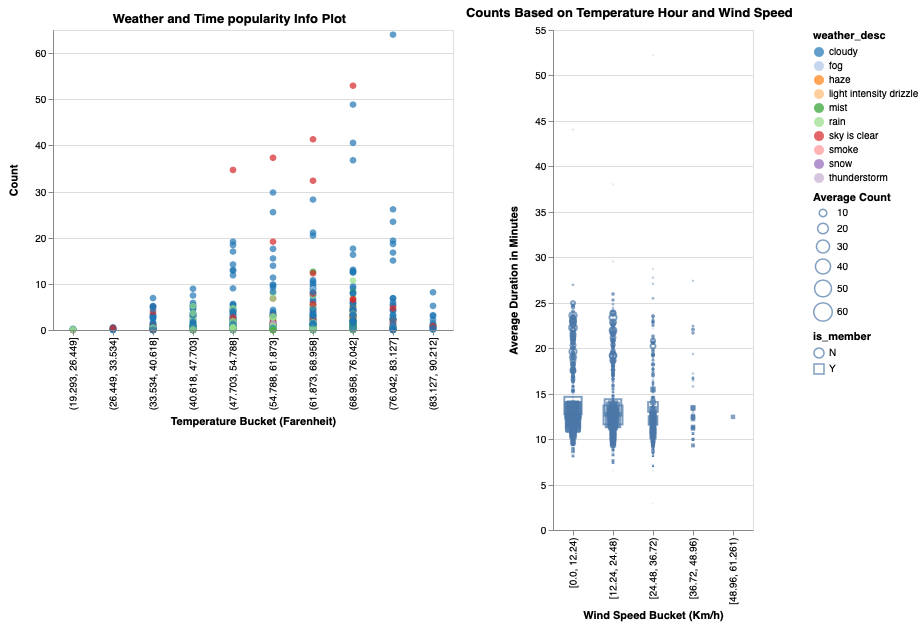

In [3]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

vis2_df = pd.read_csv('./data/vis2_hr_weather.csv').sample(frac = 0.1)
interval = alt.selection_multi(fields = ['weather_desc'])
scatter = alt.Chart(vis2_df).mark_circle(size=45).encode(
y=alt.Y('count:Q', title='Count'),
x=alt.X('temp_bin:N', title='Temperature Bucket (Farenheit)'),
color= alt.condition(interval, alt.Color('weather_desc:N', scale=alt.Scale(scheme='category20')), alt.value('lightgray')),
tooltip = [alt.Tooltip(shorthand = 'hr:N', title = ("Average Count")), alt.Tooltip(shorthand = 'weather_desc:N', title = ("Weather"))]
).properties(
selection=interval,
width=400,
title='Weather and Time popularity Info Plot'
)
hour_slider = alt.binding_range(min=1, max=24, step=1)
slider_selection = alt.selection_single(bind=hour_slider, fields=['hr'], name = "Hour")
scatter2 = alt.Chart(vis2_df).mark_point().encode(
x=alt.X('wind_bin:N', title='Wind Speed Bucket (Km/h)'),
size=alt.Size('count:Q', title='Average Count'),
y=alt.Y('duration_mean:Q', title='Average Duration in Minutes'),
shape = 'is_member:N',
tooltip = [alt.Tooltip(shorthand = 'duration_mean:Q', title = ("Average Duration")), alt.Tooltip(shorthand = 'temp_bin:N', title = ("Temperature Bucket (Farenheit)")), alt.Tooltip(shorthand = 'weather_desc', title = ("Weather")), alt.Tooltip(shorthand = 'count:Q', title = ("Average Count"))]
).properties(
selection=interval,
title='Counts Based on Temperature Hour and Wind Speed',
width=200,
height=500
).transform_filter(
interval
).add_selection(
slider_selection
).transform_filter(
slider_selection
).interactive()
((scatter) | scatter2)

-  __Components : (FULL DATA)__
    - A __scatter plot on the left__ which selects the plots which representing the different weather against the temperature bucket and the counts. If a point is selected all the points with the same weather is selected :
        - __X-axis :-__ Temperature_bin : Nominal. When a particular weather is chosen this can show the temperature buckets with the highest to the lowest counts. A high count in a particular weather show that the particular temperature range is most favourable by the bikers.
        - __Y-axis :-__ Count : Quantitative. Give the counts.
        - __Color :-__ Weather_description : Nominal. When selecting the weather all the plotted points with same weather description are highlighted with the same color. This makes the user feel that rest of the plots come under this particular weather.
        - __Tooltip :-__ count : Quantitative, weather_desciption : Nominal
    - A __range bar at the bottom__ showing hours from 1 to 24 and filters the data based on hours on all of the plots :
    - A __scatter plot on the right__ which represents the member and non-members based plotted points plotted against wind_speed bucket and average duration in minutes. This shows the plotted point under the selected hour and weather to show the members or non-members to make the journeys even at higher wind speeds.
        - __X-axis :-__ wind_bin : Nominal. Shows the speed of the wind under a particular weather and hour.
        - __Y-axis :-__ duration_mean : quantitative. Showing the average time of the trips by the bikers.
        - __Shape :-__ is_member : Nominal.
        - __Tooltip :-__ average duration, temperature bucket, weather_secription, hour
-  Interactions :
    - If a point is selected in the left scatter plot, the data filters on the right scatter plot and shows only the ones under the selected weather.
    - When the hour slider slides, data is filtered on both the scatter plots but the weather doesn’t change in the left plot thus we can find on a particular hour in a particular weather the changes in the right plot. <br><br>
    
-  Screenshots of plots and how they relate to the questions asked :

<img src="./project_plots/plot2_1.png" alt="figure doesn't in the path specified" title="Hour wise plot of Montreal BIXI bike sharing and Weather data" />

-  Questions that the above plot relates to :
    - Above the weather selected is rain  and the most frequent hour 5 pm  and on the right side plot we can see mostly the members making the journey even at wind_speed as high as ~48 km/hr. (question 5 and 6)

<img src="./project_plots/plot2_2.png" alt="figure doesn't in the path specified" title="Hour wise plot of Montreal BIXI bike sharing and Weather data" />

-  Questions that the above plot relates to :
    - The hour has been changed to the least frequent 4 am from the previous plot  and we can see that the counts have dropped and still there are more members than non-members. This deviates from the previous visualization indicating that members travel even in bad weather as they going to their everyday work/school/college.

<img src="./project_plots/plot2_3.png" alt="figure doesn't in the path specified" title="Hour wise plot of Montreal BIXI bike sharing and Weather data" />

-  Questions that the above plot relates to :
    - Here the a pleasant weather is selected i.e. sky is clear and we can see the counts going really high. Further the most favourable temperature here is ~68-76 degree fahrenheit.

## Visualization 3

### Sample Visualization 3 : (only 10 % data)

<font color=green> *__Execute the cell below to view the sample visualization 3__* <br><br> </font>
<font color=red> *__The cell below needs altair to be installed in your PC for jupyter notebook. If altair for jupyter notebook is not installed in your PC please refer :  https://altair-viz.github.io/getting_started/installation.html__* </font>

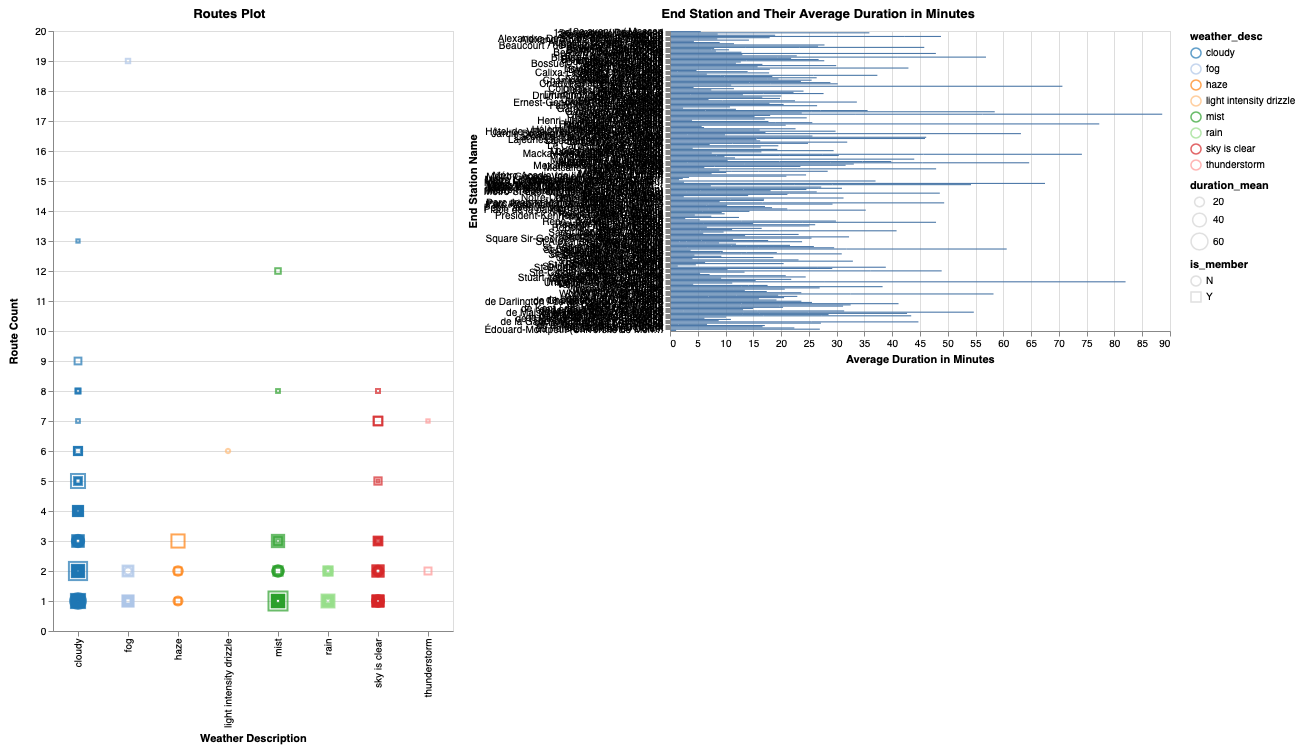

In [4]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')
vis3_df = pd.read_csv('./data/vis3_routes.csv').sample(frac = 0.1)
alt.data_transformers.enable('default', max_rows=None)
interval = alt.selection_interval(encodings = ['x', 'y'])

scatter = alt.Chart(vis3_df).mark_point(size=10).encode(
x=alt.X('weather_desc:N', title='Weather Description'),
y=alt.Size('count:Q', title='Route Count'),
color= alt.condition(interval, alt.Color('weather_desc:N', scale=alt.Scale(scheme='category20')), alt.value('lightgray')),
tooltip = [alt.Tooltip(shorthand = 'start_station_name:N', title = ("Start Station Name"))],
size = 'duration_mean:Q',
shape = 'is_member:N'
).properties(
selection=interval,
width=400,
height=600,
title='Routes Plot'
)

scatter1 = alt.Chart(vis3_df).mark_bar().encode(
y=alt.Y('end_station_name:N', title='End Station Name'),
x=alt.X('duration_mean:Q', title='Average Duration in Minutes'),
tooltip = [alt.Tooltip(shorthand = 'start_station_name:N', title = ("Start Station Name")), alt.Tooltip(shorthand = 'end_station_name:N', title = ("End Station Name"))]
).properties(
selection=interval,
title='End Station and Their Average Duration in Minutes',
width=500,
height=300
).transform_filter(
interval
)
scatter | scatter1

- __Components : (FULL DATA)__
    - A __scatter plot__ on the left which selects the plots representing the different stations against the weather and the counts. Here a interactive brush can be dragged and an area can be selected :
        - __X-axis :-__ Weather_description : Nominal. When an area is selected these weather(s) will be considered for the plotted points.
        - __Y-axis :-__ Count : Quantitative. Give the route counts.
        - __Color :-__ Weather_description : Nominal. Selected points under the area will be highlighted and rest will be faded grey
        - __Tooltip :-__ Start_station : Nominal
    - A __horizontal bar graph on the right__ which represents the routes i.e. start_station,end_station and the average time taken to cover the route . This shows the station pairs which are used in a selected weather.
        - __X-axis :-__ duration_mean : quantitative. Showing the average time of the trips by the bikers.
        - __Y-axis :-__ end_station_name : Nominal.
        - __Tooltip :-__ start_station_name, end_station_name.
-  Interactions :
    - After an area is select using a __brush__ including the station plotted points un different weather(s) the data is filtered to show those start and end stations on the right bar plot with average duration taken for each pair of stations. <br><br>
    
-  Screenshots of plots and how they relate to the questions asked :

<img src="./project_plots/plot3_1.png" alt="figure doesn't in the path specified" title="Weather wise station plot" />

-  Questions that the above plot relates to :
    - Here rainy  weather plots are selected and we can see those routes as pair of stations when we hover on the right bar plot.

#  Further Work 
- __Intend to do but didn’t complete :__ This exploratory data analysis doesn’t differentiate between working and non-working days which can bring out many important insights. This can be done just by keeping an extra column which can be convert from the start_date and end_date to a working day or a non-working day. Similarly month-wise analysis will also give interesting results.
- __What didn’t work :__ to get the plots based on different stations and different weather for every hour was didn’t work as number of records increased to ~500000 and it was difficult to render on the browser, but a subset of this data has been visualized in the third visualization. This can be handled if asychronous AJAX can be made to bring only that subset of data which is to be shown in the plots instead of sending all the data beforehand.
- __Next version :__ As I was able to get real estate property data for every city in canada with exact coordinates , this data could also have been merged with BIXI bike sharing data as it has the coordinates of the different stations. A density based clustering can be applied to cluster based on coordinates and highlight those stations which has more houses in their cluster. This could give insights that stations nearby more houses are more frequent or vise-versa.

# Conclusion
>After the exploratory data analysis of Montreal BIXI data with the historical weather data, we have come up with 3 different visualizations with numerous insights answering 7 different (or possibly more) questions pertaining to the biker’s behaviour and their biking patterns.

# Appendix
## Changes done after presentation on 18th April, 2019
- In the first plot change of color has been removed from hour for it being nominal.
- __Weather description has been bucketed__ into smaller number of values e.g. all desciptions with 'rain' in it, has been changed to only 'rain'. Similar has been done for 'snow', 'thunderstorm' and 'clouds'.
- Second scatter plot has been removed from the second plot of weather data and a __range bar__ has been added to filter data by both weather description and hour of the day.
- In the third plot the interaction has been changed to __brush__ <br><br>

## How to run the main project
- Download and Unzip the vis_project folder and navigate to that folder through __terminal__.
- Execute these commands :
    - pip install altair
    - pip install flask
    - FLASK_APP=first.py flask run
- Navigate to http://127.0.0.1:5000/   <font color=red> *__(Please make sure that any other application is not running at__*   http://127.0.0.1:5000/ )<br><br> </font>